## Base Line Model Using ID's as input

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import sklearn.neural_network as sknet

In [2]:
ingredient_name = pd.read_csv(os.getcwd() + '/project description/node_ingredient.txt', engine='python', delimiter=',,', header=None)
df = pd.read_csv(os.getcwd() + '/project description/train.csv', engine= 'python', sep='\,',  names=list(range(60)))
df1 = df.fillna(0)
df_2 = df1.values.tolist()

In [3]:
# Separating the cuisines from the recipies 
RecipyList = []
Cuisines = []
for i, val in enumerate(df_2):
    R_l = [v for v in val if v !=0]
    RecipyList.append(R_l[:-1]) 
    Cuisines.append(R_l[-1])

['greek', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'vietnamese', 'thai', 'southern_us', 'chinese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'moroccan', 'korean', 'british', 'russian']
[714, 452, 1748, 280, 590, 4678, 3836, 487, 903, 2515, 1599, 920, 283, 1543, 840, 404, 496, 474, 485, 300]


Text(0.5, 1.0, 'Cuisine (Class) Counts')

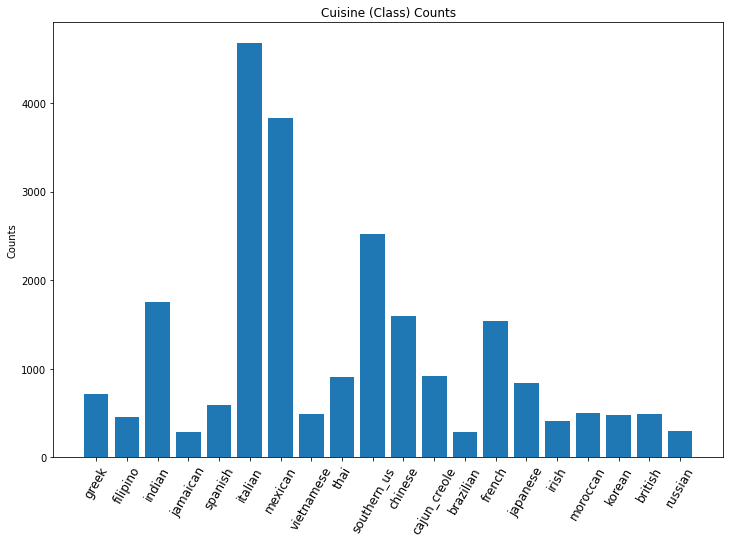

In [4]:
#plot the class counts as a bar chart
from collections import Counter

cuisine_labels = Cuisines
cuisine_counts = Counter(cuisine_labels)
print(list(cuisine_counts.keys()))
print(list(cuisine_counts.values()))

plt.figure(figsize=(12,8))
plt.bar(list(cuisine_counts.keys()), list(cuisine_counts.values()))
plt.xticks(list(cuisine_counts.keys()), list(cuisine_counts.keys()), rotation=60, fontsize='large');
plt.ylabel('Counts')
plt.title('Cuisine (Class) Counts')

In [5]:
IngredientList = (np.squeeze(ingredient_name.values)).tolist()

In [6]:
len(IngredientList)

6714

In [7]:
# Training data preparation
RecipyIngredient = []
for i, ing in enumerate(RecipyList):
    LReci = [str(int(v)) for v in ing]
    RecipyIngredient.append(LReci) 

In [8]:
RecipyStrings = []
for r in RecipyIngredient:
    RecipyStrings.append(' '.join(r))

In [9]:
ValLabels = pd.read_csv(os.getcwd() + '/project description/validation_classification_answer.csv', engine='python', delimiter=',,', header=None)
ValReci = pd.read_csv(os.getcwd() + '/project description/validation_classification_question.csv', engine= 'python', sep='\,',  names=list(range(59)), dtype='float32')

In [10]:
ValReci = ValReci.fillna(0)

In [11]:
ValCuisines = (np.squeeze(ValLabels.values)).tolist()

In [12]:
VLabels = (np.squeeze(ValLabels.values)).tolist()
VReci = ValReci.values.tolist()

In [13]:
# validation data prep
VRecipyList = []
for i, val in enumerate(VReci):
    R_l = [str(int(v)) for v in val if v !=0]
    VRecipyList.append(R_l) 

In [14]:
VRecipyStrings = []
for r in VRecipyList:
    VRecipyStrings.append(' '.join(r))

# Using Text-Based Ingredients

## Classification Task

In [15]:
import pprint
from sklearn.pipeline import Pipeline

pp = pprint.PrettyPrinter(indent=4)

skf=StratifiedKFold(n_splits=3)

print("\nresults for LR tfidf vectorizer")
lr_pipe = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2))), ('lr', LogisticRegression(max_iter=1000,random_state=123, multi_class='multinomial', solver='lbfgs'))])
cvr = cross_validate(lr_pipe, RecipyStrings, Cuisines, scoring='f1_weighted', cv = skf, return_train_score=True )
#worse testing score with ngram_range=(1, 2)
pp.pprint(cvr)
print('Average test and train F1 score:')
print(sum(cvr['test_score']/len(cvr['test_score'])))
print(sum(cvr['train_score']/len(cvr['train_score'])))


print("\nresults for LR count vector")
lr_pipe = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))), ('lr', LogisticRegression( max_iter=1000,random_state=123, multi_class='multinomial', solver='lbfgs'))])
cvr = cross_validate(lr_pipe, RecipyStrings, Cuisines, scoring='f1_weighted', cv = skf, return_train_score=True )
#worse testing score with ngram_range=(1, 2)
pp.pprint(cvr)
print('Average test and train F1 score:')
print(sum(cvr['test_score']/len(cvr['test_score'])))
print(sum(cvr['train_score']/len(cvr['train_score'])))


print("\nresults for RF tfidf vectorizer")
rf_pipe= Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2))), ('lr', RandomForestClassifier(n_estimators=100, random_state=123))])
cvr = cross_validate(rf_pipe, RecipyStrings, Cuisines, scoring='f1_weighted', cv=skf, return_train_score=True )
#worse testing scores using bigrams
pp.pprint(cvr)
print('Average test and train F1 score:')
print(sum(cvr['test_score']/len(cvr['test_score'])))
print(sum(cvr['train_score']/len(cvr['train_score'])))

print("\nresults for RF count vector")
rf_pipe= Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))), ('lr', RandomForestClassifier(n_estimators=100, random_state=123))])
cvr = cross_validate(rf_pipe, RecipyStrings, Cuisines, scoring='f1_weighted', cv=skf, return_train_score=True )
#worse testing scores using bigrams
pp.pprint(cvr)
print('Average test and train F1 score:')
print(sum(cvr['test_score']/len(cvr['test_score'])))
print(sum(cvr['train_score']/len(cvr['train_score'])))

mnb_pipe = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))), ('mnb', MultinomialNB())])

print("\nresults for MNB count vector")
cvr = cross_validate(mnb_pipe, RecipyStrings, Cuisines, scoring='f1_weighted', cv=skf, return_train_score=True )
pp.pprint(cvr)
print('Average test and train F1 score:')
print(sum(cvr['test_score']/len(cvr['test_score'])))
print(sum(cvr['train_score']/len(cvr['train_score'])))


results for LR tfidf vectorizer
{   'fit_time': array([19.05685925, 19.24303222, 20.0153687 ]),
    'score_time': array([0.10770488, 0.10672545, 0.10775518]),
    'test_score': array([0.68949037, 0.68287278, 0.68853429]),
    'train_score': array([0.82477163, 0.82434967, 0.81993952])}
Average test and train F1 score:
0.6869658127187388
0.8230202740123922

results for LR count vector
{   'fit_time': array([18.83399248, 19.486624  , 19.26898503]),
    'score_time': array([0.10772109, 0.11272907, 0.11324501]),
    'test_score': array([0.73891965, 0.73212916, 0.73886268]),
    'train_score': array([0.99643226, 0.99534831, 0.99687925])}
Average test and train F1 score:
0.7366371651621404
0.9962199387660506

results for RF tfidf vectorizer
{   'fit_time': array([28.9624939 , 27.99553013, 28.31565928]),
    'score_time': array([0.48866272, 0.48672938, 0.48270774]),
    'test_score': array([0.63482423, 0.630445  , 0.62949832]),
    'train_score': array([1., 1., 1.])}
Average test and train F1

In [33]:
# function to use the matplotlib imgshow to create a heatmap confusion matrix
# taken from here https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html and modified

import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
     
    '''
This function is modified to show the color range as normalized to f1 score
both f1 score and class count are printed in the squares
    '''
    
    if normalize:
        cm_normal = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(7, 7))

#     ax = plt.gca()

    im = plt.imshow(cm_normal, interpolation='nearest', cmap=cmap)
#     plt.imshow(cm_normal, interpolation='nearest', cmap=cmap)
#     plt.colorbar(im, cax=cax)
#     plt.colorbar(cax=cax)
    plt.grid(None) 
    # create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(im,fraction=0.046, pad=0.04)

    plt.title(title)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
#     ax.set_xticks(tick_marks, classes)
#     ax.set_xticklabels(tick_marks, rotation=45, ha='right')
#     ax.set_yticks(tick_marks, classes)

    #using the raw cm so the counts are printed on the heat map
    normalize = False
    
#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
    thresh = cm_normal.max() / 2.

    for i, j in itertools.product(range(cm_normal.shape[0]), range(cm_normal.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_normal[i, j] > thresh else "black")
        plt.text(j, i+0.25, format(cm_normal[i, j], '.2f'),
         horizontalalignment="center",
         color="white" if cm_normal[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [24]:
# cuisines=cuisine_counts.keys()

#confusion matrix to quantify mistakes were made between cuisines
# X_train, X_test, y_train, y_test = train_test_split(recipe_strings, cuisine_labels, test_size=0.25, stratify=cuisine_labels, random_state=123)

from sklearn.metrics import classification_report, f1_score, confusion_matrix


vectorizer = CountVectorizer(ngram_range=(1, 2))

# tokenize and build vocab
matrix_train=vectorizer.fit_transform(RecipyStrings)
matrix_test=vectorizer.transform(VRecipyStrings)
# print(matrix_train[:5])
lr_clf = LogisticRegression(max_iter=1000,random_state=123, multi_class='auto', solver='lbfgs')
lr_clf.fit(matrix_train, Cuisines)

y_pred = lr_clf.predict(matrix_test)


print('f1 score weighted %s' % f1_score(VLabels,y_pred, average='weighted'))
print(classification_report(VLabels, y_pred))#,target_names=cuisines))
cm_lr_test=confusion_matrix(VLabels, y_pred)
print(cm_lr_test)
 

print("results of using the LR model on the training data:")
y_pred_train = lr_clf.predict(matrix_train)
print('f1 score weighted %s' % f1_score(y_pred_train, Cuisines, average='weighted'))
print(classification_report(Cuisines, y_pred_train))#,target_names=cuisines))
cm_lr_train = confusion_matrix(Cuisines, y_pred_train)
print(cm_lr_train)

#What was misclassified in the test and train set?
index = 0
misclassifiedIndexes = []
for label, predict in zip(VLabels, y_pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
print("\n**misclassified in the test set:**\n")
for m in misclassifiedIndexes[:10]:
#     if(y_test[m]=='mexican' and y_pred[m]=='italian'):
    print("{0} classified as {1}:\n{2}\n".format(VLabels[m],y_pred[m],VRecipyStrings[m]))


index = 0
misclassifiedIndexes = []
for label, predict in zip(Cuisines, y_pred_train):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
print("\n**misclassified in the train set:**\n")
for m in misclassifiedIndexes[:5]:
    print("{0} classified as {1}:\n{2}\n".format(Cuisines[m],y_pred_train[m],RecipyStrings[m])) 
    

f1 score weighted 0.7561805034421747
              precision    recall  f1-score   support

   brazilian       0.88      0.58      0.70        85
     british       0.52      0.39      0.45       161
cajun_creole       0.75      0.66      0.70       295
     chinese       0.77      0.83      0.80       516
    filipino       0.72      0.65      0.68       141
      french       0.58      0.59      0.58       538
       greek       0.73      0.62      0.67       222
      indian       0.86      0.88      0.87       624
       irish       0.59      0.48      0.53       122
     italian       0.78      0.88      0.83      1558
    jamaican       0.78      0.41      0.53       113
    japanese       0.86      0.67      0.75       290
      korean       0.81      0.72      0.77       167
     mexican       0.86      0.90      0.88      1273
    moroccan       0.79      0.67      0.73       160
     russian       0.62      0.47      0.53        92
 southern_us       0.65      0.78      0.71 

In [25]:
Counter((y_pred == VLabels).tolist()) #0.7615

Counter({True: 5976, False: 1872})

## Using inverse weighting of classes

In [26]:
# The class_weight='balanced' argument will weigh classes inversely proportional to their frequency.

from sklearn.metrics import classification_report, f1_score, confusion_matrix


vectorizer = CountVectorizer(ngram_range=(1, 2))

# tokenize and build vocab
matrix_train=vectorizer.fit_transform(RecipyStrings)
matrix_test=vectorizer.transform(VRecipyStrings)
# print(matrix_train[:5])
lr_clf = LogisticRegression(class_weight='balanced',penalty='l2', C=2, max_iter=1000,random_state=123, multi_class='auto', solver='lbfgs')
lr_clf.fit(matrix_train, Cuisines)

y_pred = lr_clf.predict(matrix_test)



print('f1 score weighted %s' % f1_score(VLabels,y_pred, average='weighted'))
print(classification_report(VLabels, y_pred))#,target_names=cuisines))
cm_lr_test=confusion_matrix(VLabels, y_pred)
print(cm_lr_test)

 

print("results of using the LR model on the training data:")
y_pred_train = lr_clf.predict(matrix_train)
print('f1 score weighted %s' % f1_score(y_pred_train, Cuisines, average='weighted'))
print(classification_report(Cuisines, y_pred_train))#,target_names=cuisines))
cm_lr_train = confusion_matrix(Cuisines, y_pred_train)
print(cm_lr_train)

#What was misclassified in the test and train set?
index = 0
misclassifiedIndexes = []
for label, predict in zip(VLabels, y_pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
print("\n**misclassified in the test set:**\n")
for m in misclassifiedIndexes[:10]:
#     if(y_test[m]=='mexican' and y_pred[m]=='italian'):
    print("{0} classified as {1}:\n{2}\n".format(VLabels[m],y_pred[m],VRecipyStrings[m]))


index = 0
misclassifiedIndexes = []
for label, predict in zip(Cuisines, y_pred_train):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
print("\n**misclassified in the train set:**\n")
for m in misclassifiedIndexes[:5]:
    print("{0} classified as {1}:\n{2}\n".format(Cuisines[m],y_pred_train[m],RecipyStrings[m])) 
    

f1 score weighted 0.7603409138701236
              precision    recall  f1-score   support

   brazilian       0.62      0.66      0.64        85
     british       0.42      0.47      0.45       161
cajun_creole       0.71      0.72      0.71       295
     chinese       0.78      0.80      0.79       516
    filipino       0.61      0.70      0.65       141
      french       0.57      0.63      0.60       538
       greek       0.68      0.70      0.69       222
      indian       0.88      0.87      0.88       624
       irish       0.44      0.52      0.47       122
     italian       0.85      0.82      0.84      1558
    jamaican       0.70      0.50      0.58       113
    japanese       0.78      0.68      0.73       290
      korean       0.78      0.76      0.77       167
     mexican       0.91      0.88      0.89      1273
    moroccan       0.72      0.74      0.73       160
     russian       0.47      0.53      0.50        92
 southern_us       0.71      0.74      0.72 

In [27]:
Counter((y_pred == VLabels).tolist()) #0.7587

Counter({True: 5954, False: 1894})

In [31]:
# Oversampling and Undersampling

# create a dictionary, to pandas dataframe, to randomly sample by a fixed size
from sklearn.model_selection import train_test_split

# recipe_dict = {'recipe_words':RecipyStrings, 'cuisine':Cuisines}

# recipe_df = pd.DataFrame(recipe_dict, columns=['recipe_words','cuisine'])

# X_train, X_test, y_train, y_test = train_test_split(recipe_df['recipe_words'], recipe_df['cuisine'], test_size=0.25, stratify=recipe_df['cuisine'], random_state=123)


from imblearn import pipeline as pl
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


lr_pipe_os = pl.make_pipeline(CountVectorizer(ngram_range=(1, 2)),
                           RandomOverSampler(random_state=123),
                           LogisticRegression(max_iter=1000,random_state=123, multi_class='auto', solver='lbfgs'))


# Train the classifier with balancing
lr_pipe_os.fit(RecipyStrings, Cuisines)

# Test the classifier and get the prediction
y_pred_bal = lr_pipe_os.predict(VRecipyStrings)

print("results on oversampling:\n")
# Show the classification report
print(classification_report_imbalanced(VLabels, y_pred_bal))
y_pred_train_bal = lr_pipe_os.predict(RecipyStrings)
print(classification_report_imbalanced(Cuisines, y_pred_train_bal))

cm_lr_os_test = confusion_matrix(VLabels, y_pred_bal)
cm_lr_os_train = confusion_matrix(Cuisines, y_pred_train_bal)



lr_pipe_us = pl.make_pipeline(CountVectorizer(ngram_range=(1, 2)),
                           RandomUnderSampler(random_state=123),
                           LogisticRegression(max_iter=1000,random_state=123, multi_class='auto', solver='lbfgs'))


print("results on undersampling:\n")
# Train the classifier with balancing
lr_pipe_us.fit(RecipyStrings, Cuisines)

# Test the classifier and get the prediction
y_pred_bal = lr_pipe_us.predict(VRecipyStrings)

# Show the classification report
print(classification_report_imbalanced(VLabels, y_pred_bal))
y_pred_train_bal = lr_pipe_us.predict(RecipyStrings)
print(classification_report_imbalanced(Cuisines, y_pred_train_bal))

cm_lr_us_test = confusion_matrix(VLabels, y_pred_bal)
cm_lr_us_train = confusion_matrix(Cuisines, y_pred_train_bal)



results on oversampling:

                    pre       rec       spe        f1       geo       iba       sup

   brazilian       0.62      0.65      1.00      0.63      0.80      0.62        85
     british       0.43      0.47      0.99      0.45      0.68      0.44       161
cajun_creole       0.71      0.72      0.99      0.72      0.84      0.69       295
     chinese       0.78      0.80      0.98      0.79      0.89      0.78       516
    filipino       0.63      0.69      0.99      0.66      0.83      0.66       141
      french       0.56      0.61      0.97      0.59      0.77      0.57       538
       greek       0.69      0.70      0.99      0.69      0.83      0.67       222
      indian       0.88      0.87      0.99      0.87      0.93      0.85       624
       irish       0.48      0.52      0.99      0.50      0.72      0.50       122
     italian       0.84      0.83      0.96      0.83      0.89      0.79      1558
    jamaican       0.68      0.51      1.00      

In [32]:
Counter((lr_pipe_os.predict(VRecipyStrings) == VLabels).tolist()) # 0.7582

Counter({True: 5950, False: 1898})

In [33]:
def term_cuisine_count(term):
    '''
    that takes a word, and then counts how many times it occurs 
    for each of the classes
    returns a dictionary
    '''
    term_count_d = {}
    for recipe,cuisine in zip(X_train,y_train):

        if term in recipe:
            if cuisine in term_count_d.keys():
                term_count_d[cuisine] += 1
            else:
                term_count_d[cuisine] = 1
    return term_count_d

In [34]:
# this is another theory to the overfitting and try to deal with it this way

from sklearn.feature_selection import SelectKBest, chi2

vectorizer = CountVectorizer(ngram_range=(1, 2))

# tokenize and build vocab
matrix_train=vectorizer.fit_transform(RecipyStrings)
#vectorizer.fit(recipe_df['recipe_words'])
matrix_test=vectorizer.transform(VRecipyStrings)


chi2score = chi2(matrix_train,Cuisines)[0]
 
wscores = zip(vectorizer.get_feature_names(),chi2score)
wchi2 = sorted(wscores,key=lambda x:x[1], reverse=True) 



ch2 = SelectKBest(chi2, k=600)

X_chi_train = ch2.fit_transform(matrix_train, Cuisines)
X_chi_test = ch2.transform(matrix_test)
    


lr = LogisticRegression(max_iter=1000,random_state=123, multi_class='auto', solver='lbfgs')
lr.fit(X_chi_train,Cuisines)

y_pred = lr.predict(X_chi_test)


print('f1 score weighted %s' % f1_score(VLabels, y_pred, average='weighted'))
print(classification_report(VLabels, y_pred))#,target_names=cuisines))
cm_chi_test = confusion_matrix(VLabels, y_pred)
print(cm_chi_test)

 

print("results of using the LR model on the training data:")
y_pred_train = lr.predict(X_chi_train)
print('f1 score weighted %s' % f1_score(y_pred_train, Cuisines, average='weighted'))
print(classification_report(Cuisines, y_pred_train))#,target_names=cuisines))
cm_chi_train = confusion_matrix(Cuisines, y_pred_train)
print(cm_chi_train)



# plot_confusion_matrix(cm_chi_test, classes=classes, normalize=True, title="LogR (χ² 600 best) Confusion Matrix (count/normalized) - test set")
# plot_confusion_matrix(cm_chi_train, classes=classes, normalize=True, title="LogR (χ² 600 best) Confusion Matrix (count/normalized) - train set")

print("ingredient words sorted by chi2 with class frequency\n")
index = 1
for term,chi2 in wchi2[:10]:
    print("{0} - {1}: {2}".format(index,term, chi2))
    result_d=term_cuisine_count(term)
    # sort the dictionary results by the count
    sorted_d = sorted(result_d.items(), key=lambda kv: kv[1], reverse=True)
    print(sorted_d)
    print(sorted_d[0][0])
#     if sorted_d[0][0] == 'french':
#         break
    index += 1

f1 score weighted 0.6960184606063172
              precision    recall  f1-score   support

   brazilian       0.81      0.49      0.61        85
     british       0.39      0.19      0.26       161
cajun_creole       0.75      0.63      0.69       295
     chinese       0.76      0.78      0.77       516
    filipino       0.61      0.48      0.54       141
      french       0.49      0.45      0.47       538
       greek       0.70      0.59      0.64       222
      indian       0.86      0.84      0.85       624
       irish       0.55      0.38      0.45       122
     italian       0.66      0.86      0.75      1558
    jamaican       0.74      0.44      0.55       113
    japanese       0.77      0.57      0.65       290
      korean       0.77      0.67      0.72       167
     mexican       0.85      0.87      0.86      1273
    moroccan       0.76      0.64      0.69       160
     russian       0.52      0.39      0.45        92
 southern_us       0.57      0.65      0.60 

In [42]:
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
# from keras import utils
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import layers
from keras import callbacks
# from keras.utils import plot_model

# callbacks_list = [
#         callbacks.EarlyStopping(
#             monitor='acc',
#             patience=1,
#         ),
#         callbacks.ModelCheckpoint(
#             filepath='dense_model',
#             monitor='val_loss',
#             save_best_only=True,
# )]
   
max_words = 5859

tokenize = Tokenizer(num_words=max_words, char_level=False)

tokenize.fit_on_texts(RecipyStrings)

X_train_t = tokenize.texts_to_matrix(RecipyStrings)
X_test_t = tokenize.texts_to_matrix(VRecipyStrings)
vocab_size = len(tokenize.word_index) + 1  # Adding 1 because of reserved 0 index


encoder = LabelEncoder()
encoder.fit(Cuisines)
y_train_t = encoder.transform(Cuisines)
y_test_t = encoder.transform(VLabels)

num_classes = np.max(y_train_t) + 1
y_train_t1 = np_utils.to_categorical(y_train_t, num_classes)
y_test_t1 = np_utils.to_categorical(y_test_t, num_classes)

print('x_train shape:', X_train_t.shape)
print('x_test shape:', X_test_t.shape)
print('y_train shape:', y_train_t1.shape)
print('y_test shape:', y_test_t1.shape)

batch_size = 100
epochs = 15


# Build the model
model = Sequential()
model.add(layers.Dense(512, activation='relu',input_shape=(vocab_size,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# plot_model(model, show_shapes=True, to_file='dense_dl.png')

x_train shape: (23547, 5859)
x_test shape: (7848, 5859)
y_train shape: (23547, 20)
y_test shape: (7848, 20)


In [43]:
history = model.fit(X_train_t, y_train_t1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_t, y_test_t1)),
                  # class_weight = 'auto')#,
#                    callbacks=callbacks_list)

Epoch 1/15
236/236 [==============================] - 4s 14ms/step - loss: 1.6770 - accuracy: 0.5303 - val_loss: 0.7920 - val_accuracy: 0.7640
Epoch 2/15
236/236 [==============================] - 3s 13ms/step - loss: 0.5129 - accuracy: 0.8493 - val_loss: 0.7985 - val_accuracy: 0.7698
Epoch 3/15
236/236 [==============================] - 3s 13ms/step - loss: 0.2824 - accuracy: 0.9179 - val_loss: 0.8839 - val_accuracy: 0.7583
Epoch 4/15
236/236 [==============================] - 3s 13ms/step - loss: 0.1608 - accuracy: 0.9534 - val_loss: 1.0028 - val_accuracy: 0.7511
Epoch 5/15
236/236 [==============================] - 3s 13ms/step - loss: 0.0881 - accuracy: 0.9761 - val_loss: 1.1198 - val_accuracy: 0.7559
Epoch 6/15
236/236 [==============================] - 3s 13ms/step - loss: 0.0483 - accuracy: 0.9885 - val_loss: 1.2281 - val_accuracy: 0.7560
Epoch 7/15
236/236 [==============================] - 3s 13ms/step - loss: 0.0267 - accuracy: 0.9946 - val_loss: 1.3769 - val_accuracy: 0.7545

In [44]:
model.predict(X_train_t).shape

(23547, 20)

In [45]:
y_pred_t=model.predict(X_test_t)
# .88 without class weights

y_pred_train=model.predict(X_train_t)

In [46]:
score = model.evaluate(X_test_t, y_test_t1,
                       batch_size=batch_size, verbose=1)

79/79 [==============================] - 0s 3ms/step - loss: 1.7530 - accuracy: 0.7366


In [47]:
encoder.inverse_transform(y_pred_t.argmax(axis=1)), y_test_t

(array(['japanese', 'mexican', 'southern_us', ..., 'italian', 'italian',
        'thai'], dtype='<U12'),
 array([11,  5,  4, ...,  9,  9, 18]))

## Completion Task

In [48]:
# LaComp = pd.read_csv(os.getcwd() + '/project description/completion_labels.csv', engine='python', delimiter=',', header=None, dtype='float32')
# trainComp = pd.read_csv(os.getcwd() + '/project description/completion_train.csv', engine= 'python', sep=',',  names=list(range(58)), dtype='float32')
VCAns = pd.read_csv(os.getcwd() + '/project description/validation_completion_answer.csv', engine='python', delimiter=',,', header=None)
VTrain = pd.read_csv(os.getcwd() + '/project description/validation_completion_question.csv', engine= 'python', sep='\,',  names=list(range(58)), dtype='float32')

In [49]:
RecipyIngredient

[['2813', '3146', '3229', '3885', '4379', '4390', '5250', '5456', '6187'],
 ['392',
  '937',
  '1476',
  '2172',
  '2351',
  '2813',
  '3350',
  '3554',
  '3857',
  '3978',
  '5249',
  '5648'],
 ['167', '937', '2124', '2945'],
 ['400',
  '628',
  '937',
  '1396',
  '1495',
  '1783',
  '2312',
  '2356',
  '2710',
  '2945',
  '3097',
  '3447',
  '3616',
  '4038',
  '5136',
  '5162',
  '5536',
  '5648',
  '5986',
  '6241'],
 ['248',
  '937',
  '1308',
  '1476',
  '1597',
  '2106',
  '2710',
  '2900',
  '3228',
  '4917',
  '5648',
  '5774'],
 ['145',
  '163',
  '203',
  '628',
  '937',
  '1198',
  '1807',
  '1955',
  '2813',
  '5377',
  '5459',
  '6187',
  '6352'],
 ['281',
  '1308',
  '1476',
  '2426',
  '2982',
  '3128',
  '4917',
  '5377',
  '5774',
  '6492'],
 ['170',
  '937',
  '962',
  '1198',
  '1720',
  '2518',
  '3146',
  '3202',
  '3238',
  '3596',
  '4030',
  '4361',
  '5377'],
 ['1354', '3653', '5882', '6187', '6352', '6429'],
 ['310',
  '529',
  '1947',
  '2122',
  '3051',
  '

In [50]:
CompData = []
CompLabel = []
for i, inda in enumerate(RecipyIngredient):
    for a in range(len(inda)):
        compy = inda.copy()
        label = compy.pop(a)
        
        CompData.append(compy)
        CompLabel.append(label)
print(len(CompData), len(CompLabel))

253453 253453


In [51]:
CompLabel

['2813',
 '3146',
 '3229',
 '3885',
 '4379',
 '4390',
 '5250',
 '5456',
 '6187',
 '392',
 '937',
 '1476',
 '2172',
 '2351',
 '2813',
 '3350',
 '3554',
 '3857',
 '3978',
 '5249',
 '5648',
 '167',
 '937',
 '2124',
 '2945',
 '400',
 '628',
 '937',
 '1396',
 '1495',
 '1783',
 '2312',
 '2356',
 '2710',
 '2945',
 '3097',
 '3447',
 '3616',
 '4038',
 '5136',
 '5162',
 '5536',
 '5648',
 '5986',
 '6241',
 '248',
 '937',
 '1308',
 '1476',
 '1597',
 '2106',
 '2710',
 '2900',
 '3228',
 '4917',
 '5648',
 '5774',
 '145',
 '163',
 '203',
 '628',
 '937',
 '1198',
 '1807',
 '1955',
 '2813',
 '5377',
 '5459',
 '6187',
 '6352',
 '281',
 '1308',
 '1476',
 '2426',
 '2982',
 '3128',
 '4917',
 '5377',
 '5774',
 '6492',
 '170',
 '937',
 '962',
 '1198',
 '1720',
 '2518',
 '3146',
 '3202',
 '3238',
 '3596',
 '4030',
 '4361',
 '5377',
 '1354',
 '3653',
 '5882',
 '6187',
 '6352',
 '6429',
 '310',
 '529',
 '1947',
 '2122',
 '3051',
 '3622',
 '5882',
 '5970',
 '6352',
 '6448',
 '308',
 '332',
 '791',
 '937',
 '1495'

In [53]:
# Function to Convert Recipe IDs to string
def ConvertToString(RecipeIDs, IngredientNode):
    ComTReciList = []
    for i, val in enumerate(RecipeIDs):
        R_l = [v for v in val if v !=0]
        ComTReciList.append(R_l) 

    # Conversion of IDs to ingredients
    ComRecipyIngredient = []
    for i, ing in enumerate(ComTReciList):
        LReci = [str(int(v)) for v in ing]
        ComRecipyIngredient.append(LReci) 

    ComRecipyStrings = []
    for r in ComRecipyIngredient:
        ComRecipyStrings.append(' '.join(r))
        
    return ComRecipyIngredient, ComRecipyStrings

In [54]:
VTrain = VTrain.fillna(0)
VComp = VTrain.values.tolist()
VCompIn, VCompStings = ConvertToString(VComp, IngredientList)

In [55]:
def ConvertLabels(LabelIDs, IngredientNode):
    # Conversion of IDs to ingredients
#     for ing in enumerate(LabelIDs):
    LReci = [str(int(v)) for v in LabelIDs]
    
    return LReci

In [56]:
# LaCompL = (LaComp.values.tolist())[0]
VCAnsL = (np.squeeze(VCAns.values)).tolist() 
# CompTLabel = ConvertLabels(LaCompL, IngredientList)
CompALabel = ConvertLabels(VCAnsL, IngredientList)

In [57]:
CompALabel

['2061',
 '6421',
 '2945',
 '281',
 '5119',
 '5577',
 '4059',
 '469',
 '1004',
 '2032',
 '4945',
 '3826',
 '3259',
 '937',
 '3915',
 '1046',
 '2064',
 '2945',
 '1435',
 '2122',
 '3978',
 '4543',
 '1667',
 '2174',
 '2945',
 '3238',
 '5377',
 '1816',
 '4799',
 '3146',
 '5918',
 '2651',
 '5136',
 '5110',
 '3146',
 '4260',
 '2567',
 '1354',
 '2518',
 '791',
 '3556',
 '2759',
 '4582',
 '2813',
 '2945',
 '1476',
 '962',
 '3653',
 '2813',
 '579',
 '3885',
 '1390',
 '2710',
 '4266',
 '5459',
 '1953',
 '5377',
 '4195',
 '4335',
 '1858',
 '6095',
 '59',
 '4162',
 '5176',
 '2792',
 '6438',
 '2122',
 '5377',
 '530',
 '6327',
 '59',
 '5377',
 '937',
 '5204',
 '4038',
 '3725',
 '4303',
 '2518',
 '5377',
 '937',
 '401',
 '3645',
 '4582',
 '2259',
 '937',
 '3564',
 '2757',
 '5136',
 '2064',
 '4561',
 '895',
 '3324',
 '3953',
 '530',
 '1597',
 '2351',
 '3622',
 '1920',
 '5654',
 '6484',
 '1322',
 '6476',
 '1790',
 '2758',
 '5459',
 '5518',
 '1476',
 '3385',
 '4677',
 '5119',
 '6512',
 '2442',
 '4677',


In [59]:
ComRecipyIn, ComRecipyStrings = ConvertToString(CompData, IngredientList)

In [85]:
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
# from keras import utils
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import layers
from keras import callbacks
from keras.optimizers import Adam
# from keras.utils import plot_model

# callbacks_list = [
#         callbacks.EarlyStopping(
#             monitor='acc',
#             patience=1,
#         ),
#         callbacks.ModelCheckpoint(
#             filepath='dense_model',
#             monitor='val_loss',
#             save_best_only=True,
# )]
   
max_words = 5859

tokenize = Tokenizer(num_words=max_words, char_level=False)

tokenize.fit_on_texts(ComRecipyStrings)

X_train_t = tokenize.texts_to_matrix(ComRecipyStrings)
X_test_t = tokenize.texts_to_matrix(VCompStings)
vocab_size = len(tokenize.word_index) + 1  # Adding 1 because of reserved 0 index


encoder = LabelEncoder()
encoder.fit(CompLabel)
y_train_t = encoder.transform(CompLabel)
y_test_t = encoder.transform(CompALabel)

num_classes = np.max(y_train_t) + 1
y_train_t1 = np_utils.to_categorical(y_train_t, num_classes)
y_test_t1 = np_utils.to_categorical(y_test_t, num_classes)

print('x_train shape:', X_train_t.shape)
print('x_test shape:', X_test_t.shape)
print('y_train shape:', y_train_t1.shape)
print('y_test shape:', y_test_t1.shape)

batch_size = 6400
epochs = 20


# Build the model
model = Sequential()
model.add(layers.Dense(512, activation='relu',input_shape=(vocab_size,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

opt = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# plot_model(model, show_shapes=True, to_file='dense_dl.png')

x_train shape: (253453, 5859)
x_test shape: (7848, 5859)
y_train shape: (253453, 5858)
y_test shape: (7848, 5858)


In [86]:
history = model.fit(X_train_t, y_train_t1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_t, y_test_t1)),
                  # class_weight = 'auto')#,
#                    callbacks=callbacks_list)

Epoch 1/20
40/40 [==============================] - 37s 768ms/step - loss: 8.9318 - accuracy: 0.0190 - val_loss: 6.5365 - val_accuracy: 0.0409
Epoch 2/20
40/40 [==============================] - 30s 754ms/step - loss: 6.5148 - accuracy: 0.0423 - val_loss: 6.5131 - val_accuracy: 0.0409
Epoch 3/20
40/40 [==============================] - 31s 776ms/step - loss: 6.5019 - accuracy: 0.0415 - val_loss: 6.4754 - val_accuracy: 0.0414
Epoch 4/20
40/40 [==============================] - 31s 774ms/step - loss: 6.4181 - accuracy: 0.0423 - val_loss: 6.2930 - val_accuracy: 0.0420
Epoch 5/20
40/40 [==============================] - 31s 775ms/step - loss: 6.2922 - accuracy: 0.0434 - val_loss: 6.2450 - val_accuracy: 0.0435
Epoch 6/20
40/40 [==============================] - 31s 775ms/step - loss: 6.2458 - accuracy: 0.0434 - val_loss: 6.1451 - val_accuracy: 0.0447
Epoch 7/20
40/40 [==============================] - 31s 775ms/step - loss: 6.0943 - accuracy: 0.0441 - val_loss: 5.9587 - val_accuracy: 0.0466

In [87]:
y_pred_t=model.predict(X_test_t)
# .88 without class weights

y_pred_train=model.predict(X_train_t)
Counter(y_pred_t.argmax(axis=1) == y_test_t)   #0.0856

Counter({True: 672, False: 7176})